## Data Acquisition
Data acquisition for ENP: ....

The first thing to do is to acquire the data for aircraft detection via the __DataAcquisition__ class. The dataset that will be used for aircraft detection is a subset of the full ESC-50 dataset found at https://github.com/karoldvl/ESC-50/, which contains 50 categories with 40 five-second recordings per category.<br><br>
The subset is obtained by extracting only categories relevant to aircraft detection from the ESC-50 set. For aircraft detection using an in-flight MAV, only the categories _airplane_, _engine_, _helicopter_, _train_ and _wind_ are deemed relevant. Finally, an additional category consisting of random noise, referred to as _silence_, is generated.<br><br>

The obtained dataset can now be split up into a training, validation and test set. Splitting is done homogeneous across each category: with a {0.64. 0.16, 0.20} split for the sets, each set will contain respectively {25, 7, 8} recordings of each category. In other words, the training set will contain 25 airplane examples, 25 engine examples, etc.<br>

Split per category (Train, Val, Test): (25, 7, 8)


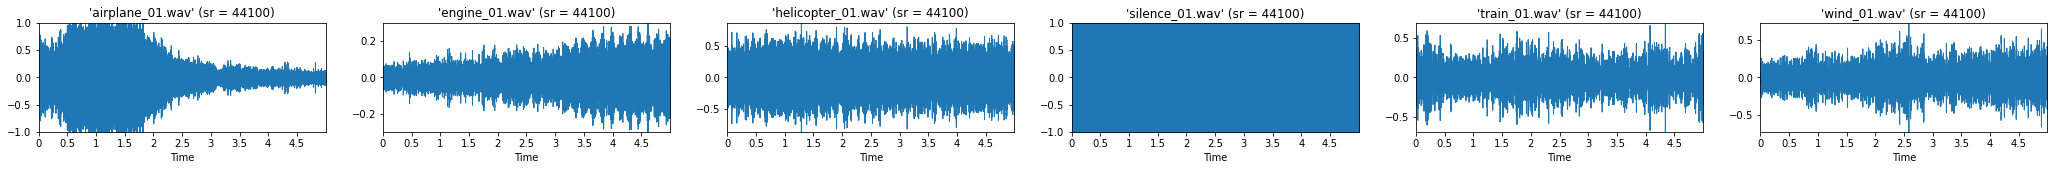

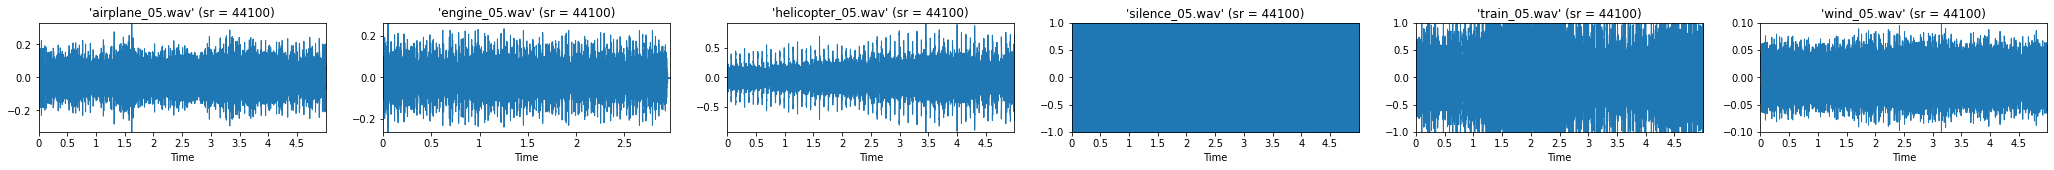

In [2]:
import aircraft_detector.aircraft_classification.data_acquisition as da
acquisition = da.DataAcquisition()

# download the ESC-50 set (600MB download, approx. 900MB unzipped), may take 5-10 minutes
acquisition.import_audio_esc50()

# extract the subset
categories = ['airplane', 'engine', 'helicopter', 'train', 'wind']
acquisition.extract_audio_from_esc50(categories)

# generate the 'silence' category (40 recordings, five second duration)
acquisition.generate_silence_category(40, 5)

# split the dataset
acquisition.split_dataset()

# plot some examples
acquisition.plot_examples('Train')
acquisition.plot_examples('Test')